## Library's Imported

In [1]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# csv files
source_churn_df = pd.read_csv("Churn_Modelling.csv")
synthesis_churn_df = pd.read_csv('train.csv')
raw_test_df = pd.read_csv('test.csv')

# dataframe size
print(f'source_churn_df shape: {source_churn_df.shape}')
print(f'synthesis_churn_df shape: {synthesis_churn_df.shape}')
print(f'raw_test_df shape: {raw_test_df.shape}')

source_churn_df shape: (10002, 14)
synthesis_churn_df shape: (165034, 14)
raw_test_df shape: (110023, 13)


In [3]:
# removed unwanted columns
reduced_source_df = source_churn_df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)
reduced_synthesis_df = synthesis_churn_df.drop(['id', 'CustomerId', 'Surname'], axis=1)
reduced_test_df = raw_test_df.drop(['id', 'CustomerId', 'Surname'], axis = 1)

In [4]:
# dataframe merged and null values check
merged_df = pd.merge(reduced_synthesis_df, reduced_source_df, how='outer')
print(f'merged_df shape: {merged_df.shape}')
merged_df.isna().sum()

merged_df shape: (174590, 11)


CreditScore        0
Geography          1
Gender             0
Age                1
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          1
IsActiveMember     1
EstimatedSalary    0
Exited             0
dtype: int64

In [5]:
# removed null values
merged_df.dropna(inplace=True)
print(f'merged_df shape: {merged_df.shape}')
merged_df.isna().sum()

merged_df shape: (174586, 11)


CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [6]:
merged_df.describe().T

,count,mean,std,min,25%,50%,75%,max
CreditScore,174586.0,656.109911,81.121546,350.00,597.00,659.00,710.00,850.00
Age,174586.0,38.174188,8.967579,18.00,32.00,37.00,42.00,92.00
Tenure,174586.0,5.019750,2.811024,0.00,3.00,5.00,7.00,10.00
Balance,174586.0,56635.984111,62976.558142,0.00,0.00,0.00,120718.28,250898.09
NumOfProducts,174586.0,1.553217,0.549271,1.00,1.00,2.00,2.00,4.00
HasCrCard,174586.0,0.751326,0.432246,0.00,1.00,1.00,1.00,1.00
IsActiveMember,174586.0,0.498637,0.500000,0.00,0.00,0.00,1.00,1.00
EstimatedSalary,174586.0,111886.291827,50794.570851,11.58,73322.02,116971.05,154767.34,199992.48
Exited,174586.0,0.211443,0.408333,0.00,0.00,0.00,0.00,1.00


In [7]:
merged_df.nunique()

CreditScore          460
Geography              3
Gender                 2
Age                   73
Tenure                11
Balance            30239
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary    55581
Exited                 2
dtype: int64

In [8]:
# setting for better visual
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)

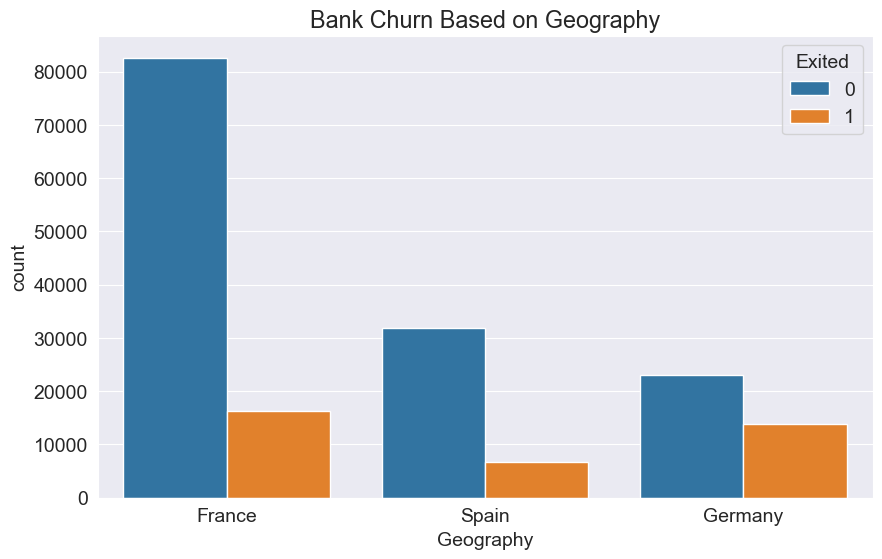

In [9]:
sns.countplot(merged_df, x='Geography', hue = 'Exited').set_title('Bank Churn Based on Geography')
plt.show()

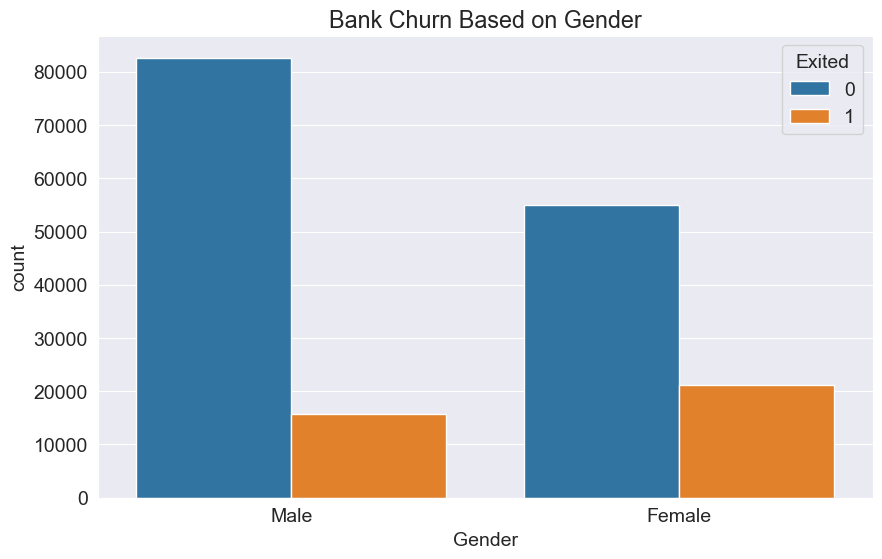

In [10]:
sns.countplot(merged_df, x='Gender', hue = 'Exited').set_title('Bank Churn Based on Gender')
plt.show()

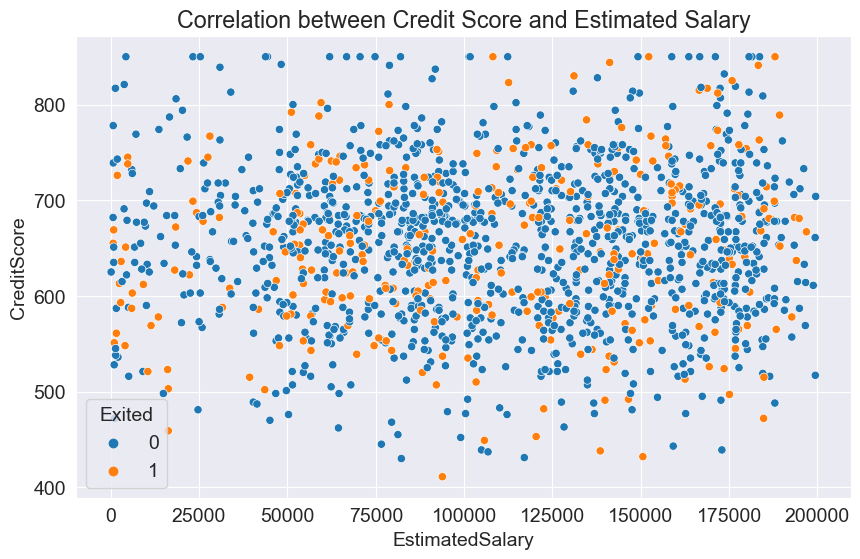

In [11]:
sns.scatterplot(merged_df.sample(1500), x='EstimatedSalary', y='CreditScore', hue='Exited', ).set_title('Correlation between Credit Score and Estimated Salary')
plt.show()

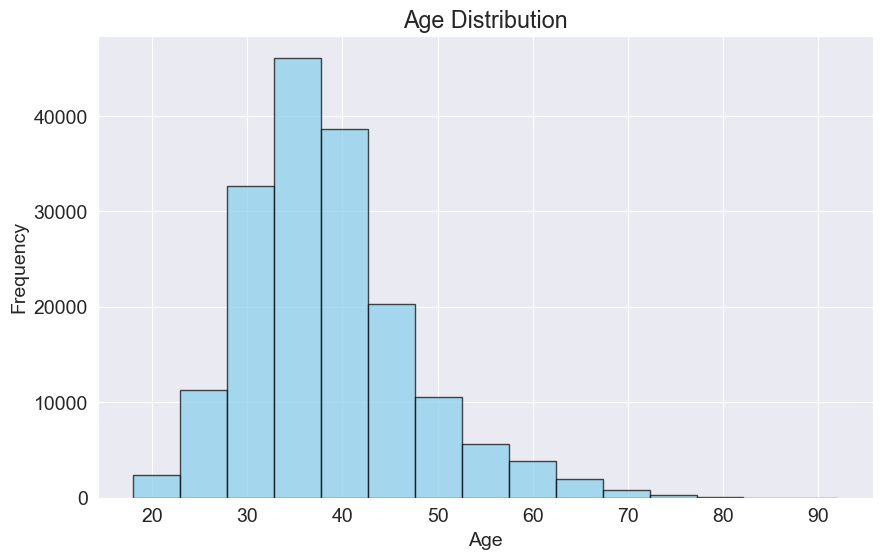

In [12]:
plt.figure(figsize=(10, 6))
plt.hist(merged_df['Age'], bins = 15, color='skyblue', edgecolor='black', alpha=0.7)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')
plt.grid(True)
plt.show()

In [13]:
# preprocessing data
from sklearn.preprocessing import MinMaxScaler

train_encoded_df = pd.get_dummies(merged_df)
test_inputs = pd.get_dummies(reduced_test_df)
print(f'encoded_df shape: {train_encoded_df.shape}')

train_inputs = train_encoded_df.drop(['Exited'], axis=1)
train_targets = train_encoded_df['Exited']

print(f'train_inputs shape: {train_inputs.shape}')
print(f'train_inputs features: {train_inputs.columns}')
print(f'train_targets shape: {train_targets.shape}')


minmax_scaler = MinMaxScaler()
minmax_scaler.fit(train_inputs)
train_inputs[train_inputs.columns] = minmax_scaler.transform(train_inputs)
test_inputs[test_inputs.columns] = minmax_scaler.transform(test_inputs)

encoded_df shape: (174586, 14)
train_inputs shape: (174586, 13)
train_inputs features: Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Geography_France',
       'Geography_Germany', 'Geography_Spain', 'Gender_Female', 'Gender_Male'],
      dtype='object')
train_targets shape: (174586,)


In [14]:
train_inputs.head(10)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,0.636,0.202703,0.3,0.000000,0.333333,1.0,0.0,0.907279,1.0,0.0,0.0,0.0,1.0
1,0.554,0.202703,0.1,0.000000,0.333333,1.0,1.0,0.247483,1.0,0.0,0.0,0.0,1.0
2,0.656,0.297297,1.0,0.000000,0.333333,1.0,0.0,0.924364,1.0,0.0,0.0,0.0,1.0
3,0.462,0.216216,0.2,0.593398,0.000000,1.0,1.0,0.422787,1.0,0.0,0.0,0.0,1.0
4,0.732,0.202703,0.5,0.000000,0.333333,1.0,1.0,0.075293,0.0,0.0,1.0,0.0,1.0
5,0.476,0.243243,0.4,0.525228,0.000000,1.0,0.0,0.680129,0.0,1.0,0.0,0.0,1.0
6,0.486,0.162162,0.8,0.577018,0.000000,1.0,0.0,0.148917,1.0,0.0,0.0,1.0,0.0
7,0.656,0.256757,0.1,0.551923,0.000000,1.0,0.0,0.534251,0.0,0.0,1.0,0.0,1.0
8,0.652,0.337838,0.4,0.000000,0.333333,1.0,0.0,0.714596,1.0,0.0,0.0,0.0,1.0
9,0.466,0.297297,0.4,0.323934,0.000000,1.0,1.0,0.854239,0.0,1.0,0.0,0.0,1.0


In [15]:
train_targets.head(10)

0    0
1    0
2    0
3    0
4    0
5    1
6    0
7    0
8    0
9    0
Name: Exited, dtype: int64

In [16]:
# train and test set spliting
from sklearn.model_selection import train_test_split
validation_size = 0.3
x_train, x_val, y_train, y_val = train_test_split(train_inputs, train_targets, test_size=validation_size, random_state=42)

print(f'x_train shape:{x_train.shape}')
print(f'y_train shape:{y_train.shape}')
print()
print(f'x_val shape:{x_val.shape}')
print(f'y_val shape:{y_val.shape}')
print()
print(f'test_df shape:{test_inputs.shape}')

x_train shape:(122210, 13)
y_train shape:(122210,)

x_val shape:(52376, 13)
y_val shape:(52376,)

test_df shape:(110023, 13)


In [17]:
# function for getting test scores
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report

def fit_and_evaluate_model(model, input_train, target_train, input_val, target_val):
    model.fit(input_train, target_train)
    
    train_prediction = model.predict(input_train)
    train_pred_proba = model.predict_proba(input_train)[:, 1]
    
    y_pred = model.predict(input_val)
    y_pred_proba = model.predict_proba(input_val)[:, 1]
    
    train_accuracy = np.round(accuracy_score(target_train, train_prediction), 3)
    train_precision = np.round(precision_score(target_train, train_prediction), 3)
    train_recall = np.round(recall_score(target_train, train_prediction), 3)
    train_f1 = np.round(f1_score(target_train, train_prediction), 3)
    train_roc_auc = np.round(roc_auc_score(target_train, train_prediction), 3)

    accuracy = np.round(accuracy_score(target_val, y_pred), 3)
    precision = np.round(precision_score(target_val, y_pred), 3)
    recall = np.round(recall_score(target_val, y_pred), 3)
    f1 = np.round(f1_score(target_val, y_pred), 3)
    roc_auc = np.round(roc_auc_score(target_val, y_pred), 3)
    
    print(str(model).split('(')[0])
    print('For Training Data:')
    print("        Accuracy:", train_accuracy)
    print("        Precision:", train_precision)
    print("        Recall:", train_recall)
    print("        F1 Score:", train_f1)
    print("        ROC AUC Score:", train_roc_auc)


    print('For Validation Data:')
    print("        Accuracy:", accuracy)
    print("        Precision:", precision)
    print("        Recall:", recall)
    print("        F1 Score:", f1)
    print("        ROC AUC Score:", roc_auc)
    return None

In [18]:
# LogisticRegression
from sklearn.linear_model import LogisticRegression

logit_model = LogisticRegression()
fit_and_evaluate_model(logit_model, x_train, y_train, x_val, y_val)

LogisticRegression
For Training Data:
        Accuracy: 0.832
        Precision: 0.694
        Recall: 0.374
        F1 Score: 0.486
        ROC AUC Score: 0.665
For Validation Data:
        Accuracy: 0.832
        Precision: 0.685
        Recall: 0.374
        F1 Score: 0.484
        ROC AUC Score: 0.664


In [19]:
# DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier(criterion='entropy', 
                                      max_depth=10,
                                      max_features='sqrt',
                                      min_samples_leaf=4,
                                      min_samples_split=2,
                                      random_state=42)
fit_and_evaluate_model(decision_tree, x_train, y_train, x_val, y_val)                                      

DecisionTreeClassifier
For Training Data:
        Accuracy: 0.855
        Precision: 0.734
        Recall: 0.497
        F1 Score: 0.592
        ROC AUC Score: 0.724
For Validation Data:
        Accuracy: 0.85
        Precision: 0.709
        Recall: 0.486
        F1 Score: 0.577
        ROC AUC Score: 0.716


In [20]:
# RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

random_forest_model = RandomForestClassifier(n_estimators=100,
                                            criterion='entropy',
                                            max_depth=7,
                                            min_samples_leaf=3,
                                            min_samples_split=7,
                                            max_features='sqrt')
fit_and_evaluate_model(random_forest_model, x_train, y_train, x_val, y_val)

RandomForestClassifier
For Training Data:
        Accuracy: 0.859
        Precision: 0.789
        Recall: 0.458
        F1 Score: 0.579
        ROC AUC Score: 0.712
For Validation Data:
        Accuracy: 0.86
        Precision: 0.786
        Recall: 0.462
        F1 Score: 0.581
        ROC AUC Score: 0.714


In [21]:
# XGBClassifier
from xgboost import XGBClassifier
xgboost_model = XGBClassifier(n_estimators=100, max_depth=5)
fit_and_evaluate_model(xgboost_model, x_train, y_train, x_val, y_val)

XGBClassifier
For Training Data:
        Accuracy: 0.874
        Precision: 0.767
        Recall: 0.58
        F1 Score: 0.661
        ROC AUC Score: 0.766
For Validation Data:
        Accuracy: 0.866
        Precision: 0.737
        Recall: 0.566
        F1 Score: 0.64
        ROC AUC Score: 0.756


In [22]:
# model fitted on training data set
xgboost_model = xgboost_model.fit(x_train, y_train)
prediction = xgboost_model.predict(test_inputs)

In [23]:
raw_test_df['Exited'] = prediction
raw_test_df.loc[raw_test_df['Exited'] == 1, 'chance_to_churn'] = True
raw_test_df.loc[raw_test_df['Exited'] == 0, 'chance_to_churn'] = False

In [24]:
raw_test_df

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,chance_to_churn
0,165034,15773898,Lucchese,586,France,Female,23.0,2,0.00,2,0.0,1.0,160976.75,0,False
1,165035,15782418,Nott,683,France,Female,46.0,2,0.00,1,1.0,0.0,72549.27,1,True
2,165036,15807120,K?,656,France,Female,34.0,7,0.00,2,1.0,0.0,138882.09,0,False
3,165037,15808905,O'Donnell,681,France,Male,36.0,8,0.00,1,1.0,0.0,113931.57,0,False
4,165038,15607314,Higgins,752,Germany,Male,38.0,10,121263.62,1,1.0,0.0,139431.00,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110018,275052,15662091,P'eng,570,Spain,Male,29.0,7,116099.82,1,1.0,1.0,148087.62,0,False
110019,275053,15774133,Cox,575,France,Female,36.0,4,178032.53,1,1.0,1.0,42181.68,0,False
110020,275054,15728456,Ch'iu,712,France,Male,31.0,2,0.00,2,1.0,0.0,16287.38,0,False
110021,275055,15687541,Yegorova,709,France,Female,32.0,3,0.00,1,1.0,1.0,158816.58,0,False
